# Regression_with_an_Insurance_Dataset
- Compétition disponible sur : https://www.kaggle.com/competitions/playground-series-s4e12/overview
- **Objectif :** L'objectif  est de prédire les primes d'assurance en fonction de diverses caractéristiques des clients et des détails de la police. Les compagnies d'assurance s'appuient souvent sur des approches fondées sur les données pour estimer les primes, en tenant compte de facteurs tels que l'âge, le revenu, l'état de santé et les antécédents en matière de sinistres

Le défi ici est de prédire les primes d'assurance en fonction de différents facteurs.

In [1]:
import pandas as pd
import os
# ^^^ pyforest auto-imports - don't write above this line
# packaging manipulation des données : 
import os
import warnings
from termcolor import colored

import numpy as np
import pandas as pd

# packaging pour données manquantes
import missingno as msn  


#packaging visualisation des données : 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Packaging imputation données :
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

#Packaging test statistiques :

from scipy.stats import shapiro,kendalltau, mannwhitneyu, kruskal

#packaging preprocessing :
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler


warnings.filterwarnings("ignore")

# Plan : 

## 1. Connaissance du jeu de données:
- Explication des features et de la target
- Definir le type de données
- Regarder les données manquantes 


## 2. Traitement des données manquantes : 
- Visualisation & Imputation :
    - Visualisation :
        * 2.1 : variables continues
        * 2.2 : variables discrètes
        * 2.3 : variables qualitatives
    - Imputation 
## 3. Datavisualisation  :
- Analyse univariée
    - Visualisation des variables numériques (discrète / continues) & test de shapiro (normalité)
    - Visualisation des variables qualitatives 
        - Variables qualitatives à moins de 20 modalités 
        - Variables qualitatives à plus de 20 modalités 
    - Visualisation des variables temporelles
    
- Analyse bivariée : Target Vs features
    - Target vs variables continues
    - Target vs variables qualitatives/discrètes
    - Target vs variables temporelles

## 4. Test statistique
- Target vs variable continues
- Target vs variables discretes + qualitatives

## 5. Preprocessing : Standardisation et encodage
### train/test : 
- Imputation du test
- Standardisation
- Encodage


## 6. Enregistrement des dataframes 
- Dataframe : avec toutes les features
- Dataframe : avec suppression des features qualitatives

## 1. Connaissance du jeu de données:
- Explication des features et de la target
- Definir le type de données
- Regarder les données manquantes ?

In [1]:
path = ("//").join(os.getcwd().split("\\")[:-1])+"//dataset"
path

<IPython.core.display.Javascript object>

'D://etude_data_science//Kaggle_competition//12_Regression_with_an_Insurance_Dataset//dataset'

In [2]:
#Ouverture des données :
data = pd.read_csv(path+'//train.csv')
test = pd.read_csv(path+'//test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
#Création d'une copie du dataframe train :
df = data.copy()

In [5]:
print("Dimensions des données :")
print("Nombre de lignes/colonnes :",df.shape)

Dimensions des données :
Nombre de lignes/colonnes : (1200000, 21)


In [6]:
pd.set_option("display.max_columns",None)
#Aperçu des données : 
df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [7]:
#Remettre l'affichage par défaut : 
# pd.reset_option("display.max_columns")

#### Feature/Target explication : 

On peut retrouver les différentes information de cette compétition sur https://www.kaggle.com/datasets/schran/insurance-premium-prediction
- **Age** : âge de l'assuré (numérique)
- **Gender** : Sexe de l'assuré (catégorique : homme, femme)
- **Annual Income** : Revenu annuel de l'assuré (numérique, asymétrique)
- **Marital Status**  : État civil de l'assuré (catégorique : célibataire, marié, divorcé)
- **Number of Dependents** :  Nombre de personnes à charge (Numérique, avec des valeurs manquantes)
- **Education Level** : Niveau d'éducation : niveau d'éducation le plus élevé atteint (catégorique : école secondaire, licence, maîtrise, doctorat)
- **Occupation** : Profession de l'assuré (catégorique : employé, travailleur indépendant, chômeur) 
- **Health Score** : Score représentant l'état de santé (numérique, asymétrique)
- **Location** : Type de lieu (catégorique : urbain, suburbain, rural)
- **Policy Type** : Type de police d'assurance (catégorique : de base, complète, premium)

- **Previous Claims** : Nombre de sinistres antérieurs (numérique, avec des valeurs aberrantes)
- **Vehicle Age** :  Âge du véhicule assuré (numérique)
- **Credit Score** : Cote de crédit de l'assuré (numérique, avec des valeurs manquantes)
- **Insurance Duration** : Durée de la police d'assurance (Numérique, en années)
- **Policy Start Date** : Date de début de la police d'assurance (Texte, mal formaté)
- **Customer Feedback** : Brefs commentaires des clients (Texte)
- **Smoking Status** : Statut de fumeur de l'assuré (catégorique : oui, non)
- **Exercise Frequency** : Fréquence de l'exercice physique (catégorique : quotidien, hebdomadaire, mensuel, rarement)
- **Property Type :** type de propriété (catégorique : maison, appartement, copropriété)


#### Target : 
- **Premium Amount** : Variable cible représentant le montant de la prime d'assurance (Numérique, asymétrique)

#### Information supplémentaire :  


- **Valeurs manquantes**: Certaines caractéristiques contiennent des valeurs manquantes pour simuler des problèmes de collecte de données dans le monde réel.

- **Type de données incorrectes** : Certains champs sont intentionnellement définis sur des types de données incorrects afin de pratiquer le nettoyage des données.

- **Distributions asymétriques** : Les caractéristiques **numériques** telles que le **Annual Income** et **Premium Amount** ont des **distributions asymétriques**, qui peuvent être traitées par des transformations
    - En d'autres termes, il faudra utiliser des transformation telle que l'utilisation du logarithme, racine carrée, etc.. pour visualiser correctement les données (certainement la présence d'outliers dû à des observations soit rare ou des erreurs de données à l'origine de ces distributions)

#### Données manquantes : 

In [8]:
df.isnull().mean()[df.isnull().mean()>0].sort_values(ascending=False)*100

Previous Claims         30.335750
Occupation              29.839583
Credit Score            11.490167
Number of Dependents     9.139333
Customer Feedback        6.485333
Health Score             6.173000
Annual Income            3.745750
Age                      1.558750
Marital Status           1.544083
Vehicle Age              0.000500
Insurance Duration       0.000083
dtype: float64

- 3 colonnes avec nan > 10%
- 2 colonnes avec nan < 1%
- 6 colonnes avec  1% < nan < 10%

Soit 11 colonnes avec des NaN

## 2. Traitement des données manquantes : 
### Séparation en fonction de leur nature :

- Pour visualiser correctement les données, nous allons les récupérer et les séparer en fonction de leur type afin de les visualiser avec les outils adéquats
- Nous en profiterons pour corriger si nécessaire leurs **dtypes**

In [9]:
#Récupération des colonnes avec des NaN : 
col_NaN = df.isnull().sum()[df.isnull().sum()>0].keys().tolist()

Analysons leur dtypes et affichons les premières lignes pour observer si cela est cohérent :

In [10]:
print(df[col_NaN].info())
df[col_NaN].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 11 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1181295 non-null  float64
 1   Annual Income         1155051 non-null  float64
 2   Marital Status        1181471 non-null  object 
 3   Number of Dependents  1090328 non-null  float64
 4   Occupation            841925 non-null   object 
 5   Health Score          1125924 non-null  float64
 6   Previous Claims       835971 non-null   float64
 7   Vehicle Age           1199994 non-null  float64
 8   Credit Score          1062118 non-null  float64
 9   Insurance Duration    1199999 non-null  float64
 10  Customer Feedback     1122176 non-null  object 
dtypes: float64(8), object(3)
memory usage: 100.7+ MB
None


,Age,Annual Income,Marital Status,Number of Dependents,Occupation,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback
0,19.0,10049.0,Married,1.0,Self-Employed,22.598761,2.0,17.0,372.0,5.0,Poor
1,39.0,31678.0,Divorced,3.0,NaN,15.569731,1.0,12.0,694.0,2.0,Average
2,23.0,25602.0,Divorced,3.0,Self-Employed,47.177549,1.0,14.0,NaN,3.0,Good
3,21.0,141855.0,Married,2.0,NaN,10.938144,1.0,0.0,367.0,1.0,Poor
4,21.0,39651.0,Single,1.0,Self-Employed,20.376094,0.0,8.0,598.0,4.0,Poor


#### Observation : 
- Nous avons uniquement deux types de données : object et float
    - object : concerne les 3 variables qualitatives et c'est **cohérent**, on notera la présence d'une variable **nominale** : **Customer Feedback**
    - float : parmis ces features on retrouve des variables numériques quantitatives **continues** et **discrètes**
    
Observons le **nunique** de ces variables afin de les séparer correctement : 

In [11]:
print(colored("Répartition du nombre de modalité en fonction du type de variable :\n",attrs=["bold"], color="green"))
print(colored("Variable qualitatives :", attrs=["bold"], color="blue"))
print(df[col_NaN].select_dtypes(include="object").nunique().sort_values(),"\n")
print(colored("Variable numériques :", attrs=["bold"], color="blue"))
print(df[col_NaN].select_dtypes(exclude="object").nunique().sort_values(),)

Répartition du nombre de modalité en fonction du type de variable :

Variable qualitatives :
Marital Status       3
Occupation           3
Customer Feedback    3
dtype: int64 

Variable numériques :
Number of Dependents         5
Insurance Duration           9
Previous Claims             10
Vehicle Age                 20
Age                         47
Credit Score               550
Annual Income            88593
Health Score            532657
dtype: int64


- Les variables qualitatives prennent 3 modalités
- Pour les numériques, au vu des résultats on pourra considérer jusqu'au 50 premières modalités que nous ayons affaire à des variables discrètes puis à partir des 550 modalités de **Credit Score** des variables continues
- Conclusion :
    - modalité < 50 : **variables discrètes**
    - modalité > 50 : **variables continues**

In [12]:
# Création des listes contenant les variables en fonction de leur natures : 

var_qual_NaN = []
var_dis_NaN = []
var_cont_NaN = []
print(colored("Séparation des features contenant des NaN en fonction de leur nature","magenta",attrs=["bold"]))

for col in col_NaN:
    column = df[col]
    if column.dtypes == "object": #si variables qualitatives:
        var_qual_NaN.append(col)
    else: #sinon (variables continues/discrètes)
        if column.nunique() < 50: #si variable discrète :
            var_dis_NaN.append(col)
        else: #sinon, si variable continue :
            var_cont_NaN.append(col)

print("\n",
    colored("Variables qualitatives :","blue",attrs=["bold"]), colored(var_qual_NaN,"blue"), "\n",

    colored("Variables discrètes :","light_red",attrs=["bold"]),colored(var_dis_NaN,"light_red"),"\n",
    colored("Variables continues : ","green",attrs=["bold"]),colored(var_cont_NaN,"green"),
     )

Séparation des features contenant des NaN en fonction de leur nature

 Variables qualitatives : ['Marital Status', 'Occupation', 'Customer Feedback'] 
 Variables discrètes : ['Age', 'Number of Dependents', 'Previous Claims', 'Vehicle Age', 'Insurance Duration'] 
 Variables continues :  ['Annual Income', 'Health Score', 'Credit Score']


* Nous allons pouvoir visualiser et traiter chaque colonne contenant des NaN en fonction de leur nature
* Ensuite nous modifierons leur dtypes une fois que les valeurs manquantes seront traitées

### Visualisation et imputation :
#### 2.1. Variables continues

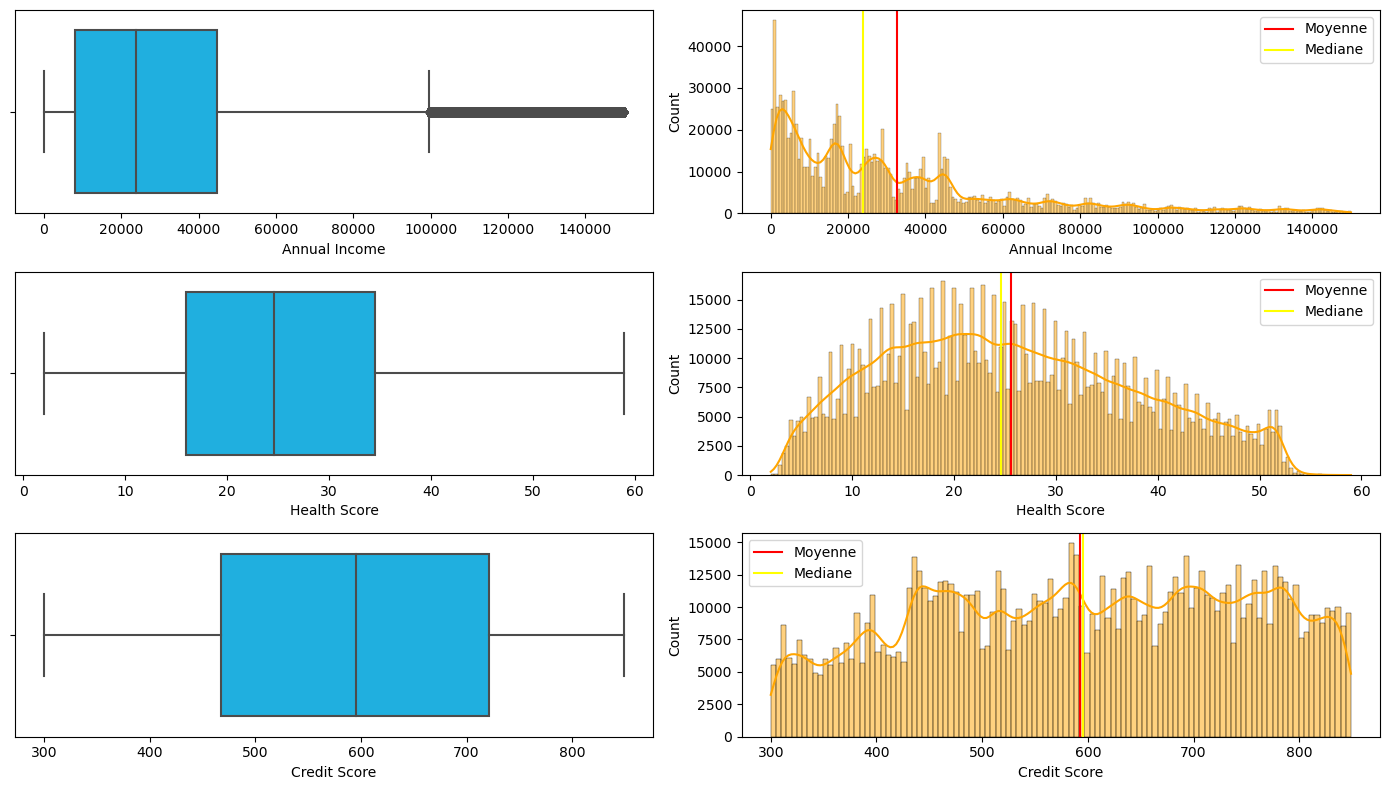

In [360]:
def visualisation_var_cont(columns,data, nrow,ncol,size=(10,8)):
    """
    Fonction qui trace un boxplot suivi d'un histplot pour chaque features
    columns = liste contenant les colonnes a analyser
    data = jeu de données 
    nrow = nombre de lignes 
    ncol = nombre de colonnes
    size = taille des figures
    """
    plt.figure(figsize=size)
    for index, col in enumerate(columns):
        #Tracage des boxplot 
        plt.subplot(nrow,ncol,2*index+1)
        sns.boxplot(x=col, data = data, color = "deepskyblue")

        #Tracage des histogrammes : 
        plt.subplot(nrow,ncol,2*index+2)
        ax=sns.histplot(x=col,data=data, kde=True,color="orange")
        ax.axvline(data[col].mean(), c = "red", label = "Moyenne")
        ax.axvline(data[col].median(), c = "yellow", label = "Mediane")
        ax.legend()

    plt.tight_layout()
    plt.show()
    
visualisation_var_cont(columns=var_cont_NaN,data=df, nrow=3,ncol=2,size=(14,8))

#### Observation : 
- **Health Score & Credit Score** : La distribution ne semble pas montrer la présence d'outliers, avec une médiane et une moyenne assez proche
- **Annual Income** : présence d'outliers.  Il y a très peu de chance que ces valeurs soient des erreurs, elles doivent appartenir à une classe minoritaire d'individu avec des salaires plus élevés. 


Observons cela :

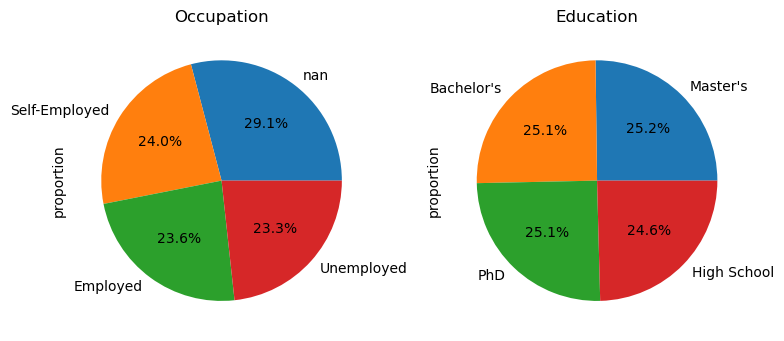

In [14]:
highest_income = df[df["Annual Income"]>=10**5]
occupation_high_income = highest_income["Occupation"].value_counts(dropna=False, normalize=True)*100
education_high_income = highest_income["Education Level"].value_counts(dropna=False, normalize=True)*100

plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
occupation_high_income.plot(kind="pie", autopct = "%.1f%%")
plt.title("Occupation")
plt.subplot(1,2,2)
education_high_income.plot(kind="pie", autopct = "%.1f%%")
plt.title("Education")

plt.tight_layout()
plt.show()

#### Observation :
- On peut voir que parmis les individus avec les plus haut salaires, tout est **équiréparti**
- Autrement dit, peu importe le niveau d'étude ou même le poste occupé, tous perçoivent un haut salaire annuel 


On imputera **Annual Income** par la **médiane** et les **deux autres features** par la **moyenne**

#### 2.2. Variables discrètes

In [13]:
df[var_dis_NaN].nunique().sort_values()

Number of Dependents     5
Insurance Duration       9
Previous Claims         10
Vehicle Age             20
Age                     47
dtype: int64

In [14]:
def visualisation_var_dis(columns,data, nrow,ncol,size=(14,12)):
    plt.figure(figsize=size)
    
    """
    Trace un histplot affichant les % de chaque modalité pour une feature avec plus de 20 modalités
    sinon un countplot
    """
    for index, col in enumerate(columns,1):
        plt.subplot(nrow,ncol,index)
        if data[col].nunique()>20:
            sns.histplot(x=col,data=data,stat="percent")
        else:
            ax = sns.countplot(x=col, data = data) #countplot
            ax.set_xlabel(col)#Nom de la colonne pour le titre de l'axe x
            ax.set_ylabel("Count") #nom de la colonne pour le titre de l'axe y
            xlab = ax.get_xticklabels() #récupération des annotation en x
            ax.set_xticklabels(rotation=45, labels = xlab ) #rotation de 45degre pour faciliter la lecture
    plt.tight_layout()        
    plt.show() 

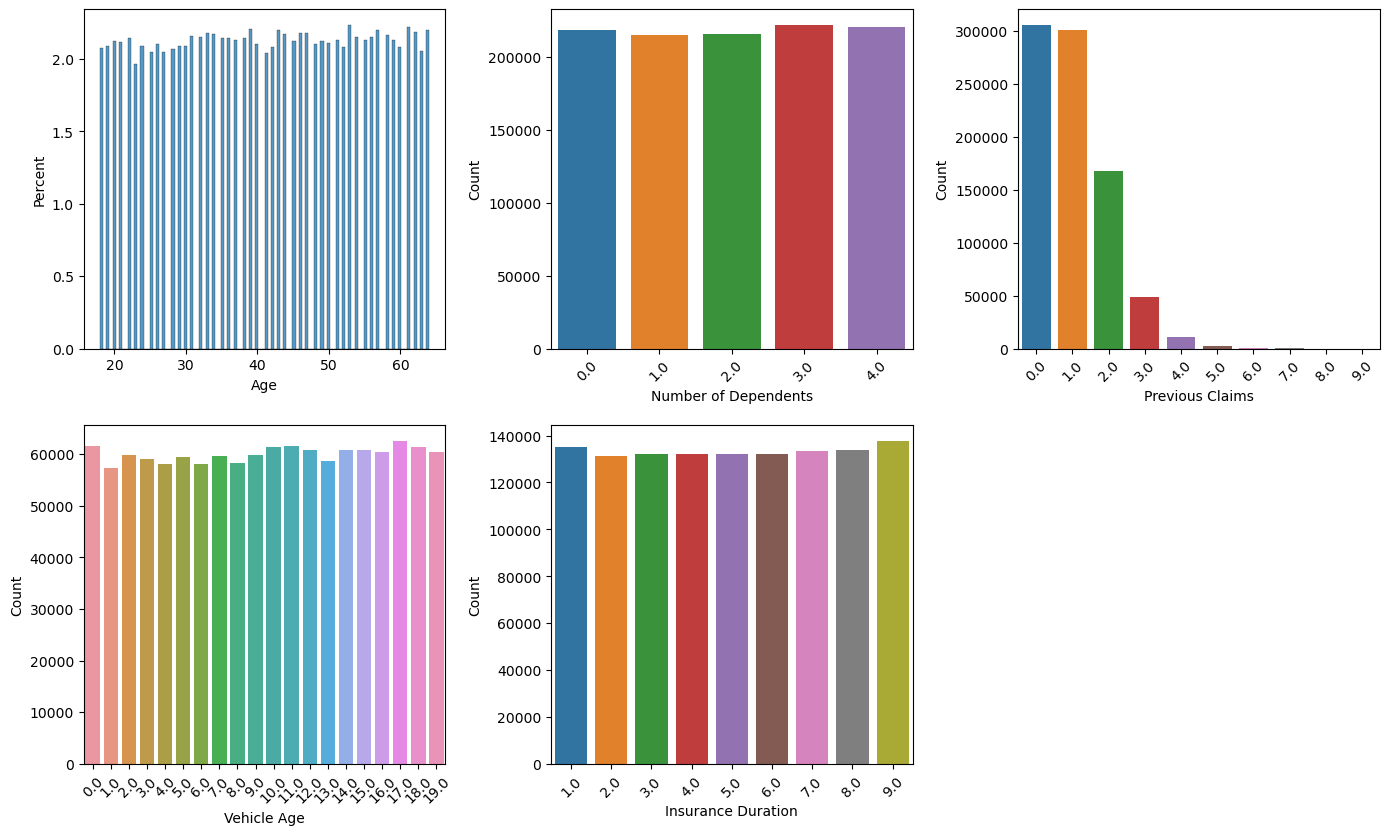

In [20]:
visualisation_var_dis(var_dis_NaN, df, 3,3)

#### Observation : 
- On peut noter qu'à l'exception de la feature **Previous Claims** toutes les autres variables sont **équilibrées**
- On remplacera les données manquantes par le mode pour chaque features

#### 2.3. Variables qualitatives

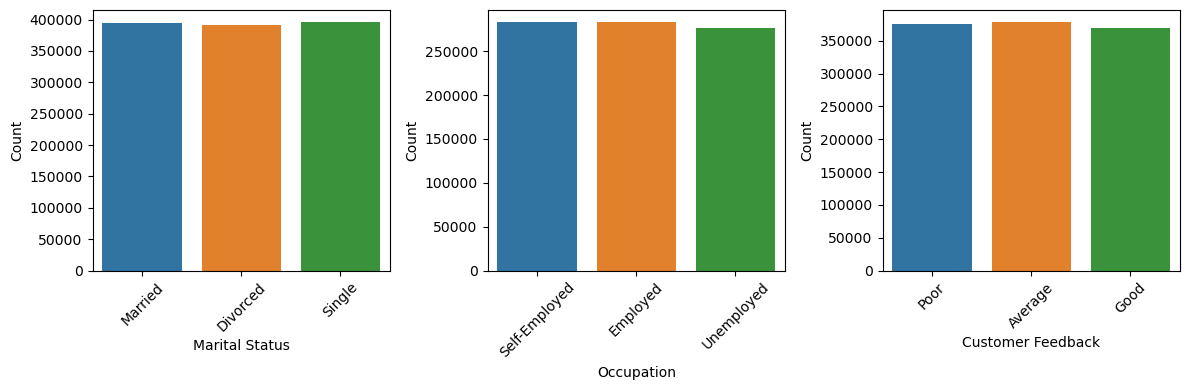

In [24]:
visualisation_var_dis(var_qual_NaN, df, 1,3,size=(12,4))

#### Observation : 
- Même constat ici avec des features contenant des **données très équilibrées** et nous allons **imputer par le mode**

### Imputation : 

In [15]:
#Séparation des colonnes en fonction de la stratégie d'imputation à adopter :
col_mean = [i for i in var_cont_NaN if i != "Annual Income"] #variable quantatives continues 
col_med = [i for i in var_cont_NaN if i not in col_mean] #variable quantatives continues avec outliers
col_most_freq = var_dis_NaN+var_qual_NaN #variables qualitatives + discrètes

In [16]:
imputer_mean = SimpleImputer(strategy="mean")
df[col_mean] = imputer_mean.fit_transform(df[col_mean])

In [17]:
imputer_med = SimpleImputer(strategy="median")
df[col_med] = imputer_med.fit_transform(df[col_med])

In [18]:
imputer_most_freq = SimpleImputer(strategy='most_frequent')
df[col_most_freq] = imputer_most_freq.fit_transform(df[col_most_freq])

#### Attention a remettre le dtype d'origine sur les variables discrètes qui sont devenu "object"

In [19]:
df[var_dis_NaN] = df[var_dis_NaN].astype(float)

### Observation de l'impacte de l'imputation des données :

#####  variables discrètes :

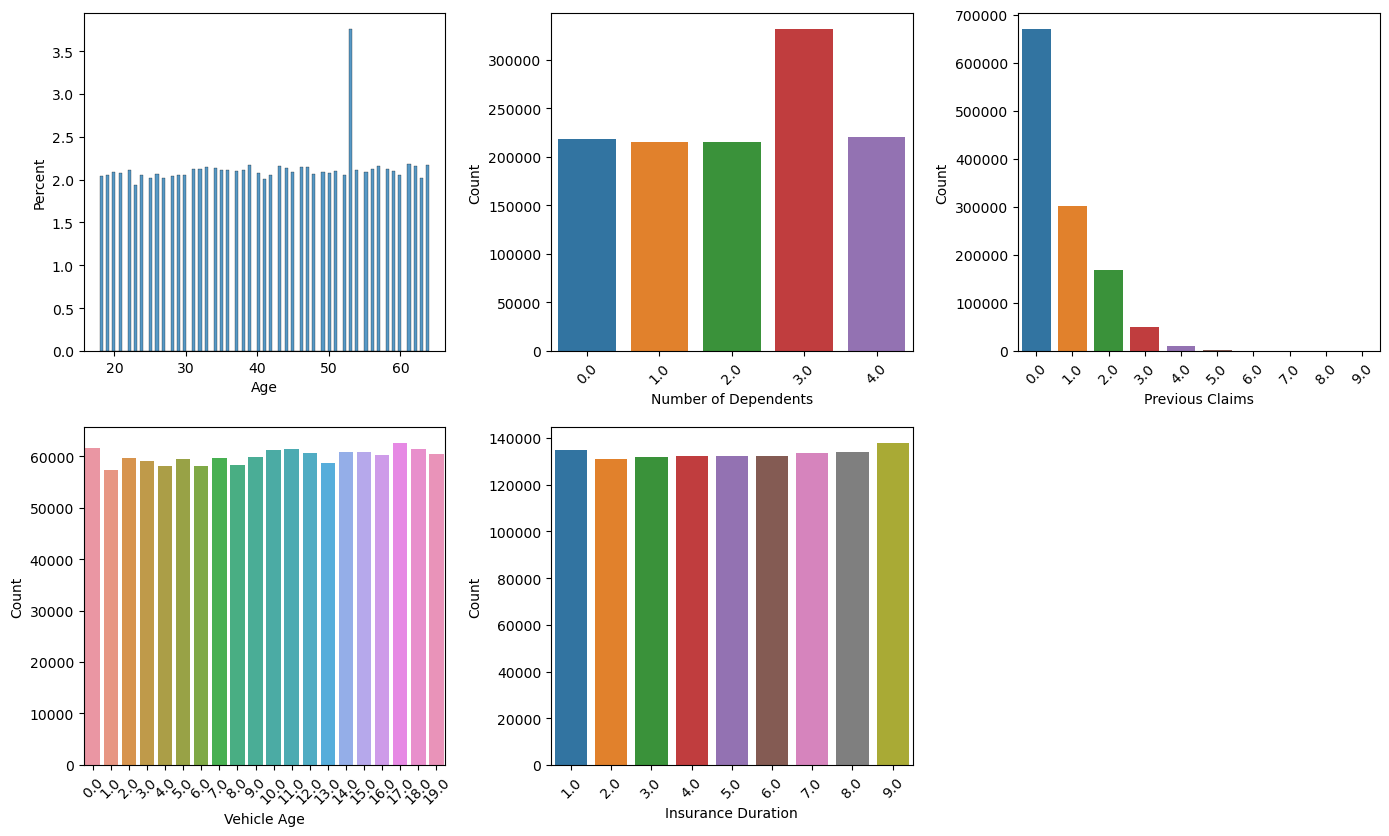

In [176]:
visualisation_var_dis(var_dis_NaN, df, 3,3)

#### Observation :
- On peut voir que cette imputation a surtout modifier les features **Age** et **Number of Dependents** avec l'introduction de ce biais
- Nous pourrons revenir ultérieurement et appliquer une autre stratégie si la partie modélisation n'est pas convaincante

##### Variables qualitatives : 

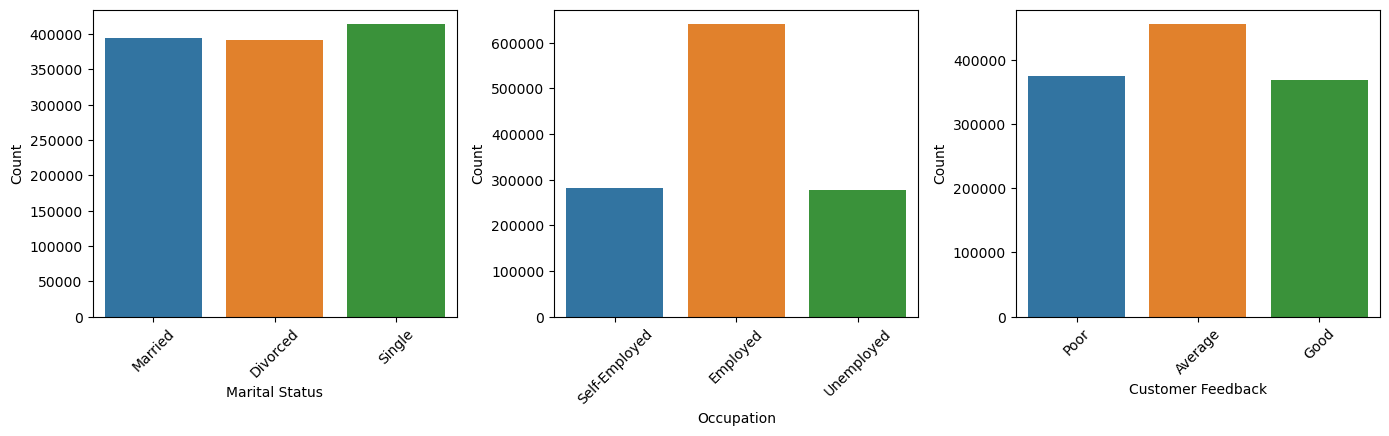

In [192]:
visualisation_var_dis(var_qual_NaN, df, 3,3)

#### Observation: 
- Même constat après imputation, surtout pour la features Occupation ou on voit que le biais est plus élevé

#### Conclusion 2. : 
- Nous avons des données pour la plupart très équilibrées
    - variable continues : 1 variable contenant beaucoup d'outliers
    - variable qualitatives & discrètes : données majoritairement équilibrée
    


## 3. Datavisualisation  :
- 3.1 Analyse univariée
    -  Visualisation des variables numériques (discrète / continues) & test de shapiro (normalité)
    - Visualisation des variables qualitatives 
    - Visualisation des variables temporelles
    


### 3.1 Analyse univariée :

#### Visualisation des variables numériques & Test de Shapiro (test de normalité) :
#####  Variables continues

In [20]:
# Récupération des features continues :
df.select_dtypes(exclude="object").nunique().sort_values()

Number of Dependents          5
Insurance Duration            9
Previous Claims              10
Vehicle Age                  20
Age                          47
Credit Score                551
Premium Amount             4794
Annual Income             88593
Health Score             532658
id                      1200000
dtype: int64

* **Ajustons les dtypes en fonction de la nature des features** 
    - variables **continues** : dtypes = **float**
    - variables **discrètes** : dtypes = **int**
    - variables **qualitatives** : dtypes = **object**
    - variables **temporelles** : dtypes = **datetime**

- A l'exception d'**id** qui n'est pas une feature à proprement parlé, nous allons, comme pour l'imputation, considérer les features avec **modalités > 50** comme variable continue, sinon comme discrète

In [21]:
var_cont = [i for i in df.select_dtypes(exclude="object") if (df[i].nunique()>50) & (i!= "id")]
var_dis = [i for i in df.select_dtypes(exclude="object") if (i not in var_cont ) & (i!= "id")]

In [22]:
#Modification du dtypes
for i in var_dis:
    df[i] = df[i].astype(int)

In [23]:
print(colored(f"Variable discrètes : ","red",attrs=["bold"]) , var_dis)
print(colored(f"Variable continues : ","green",attrs=["bold"]) , var_cont)

Variable discrètes :  ['Age', 'Number of Dependents', 'Previous Claims', 'Vehicle Age', 'Insurance Duration']
Variable continues :  ['Annual Income', 'Health Score', 'Credit Score', 'Premium Amount']


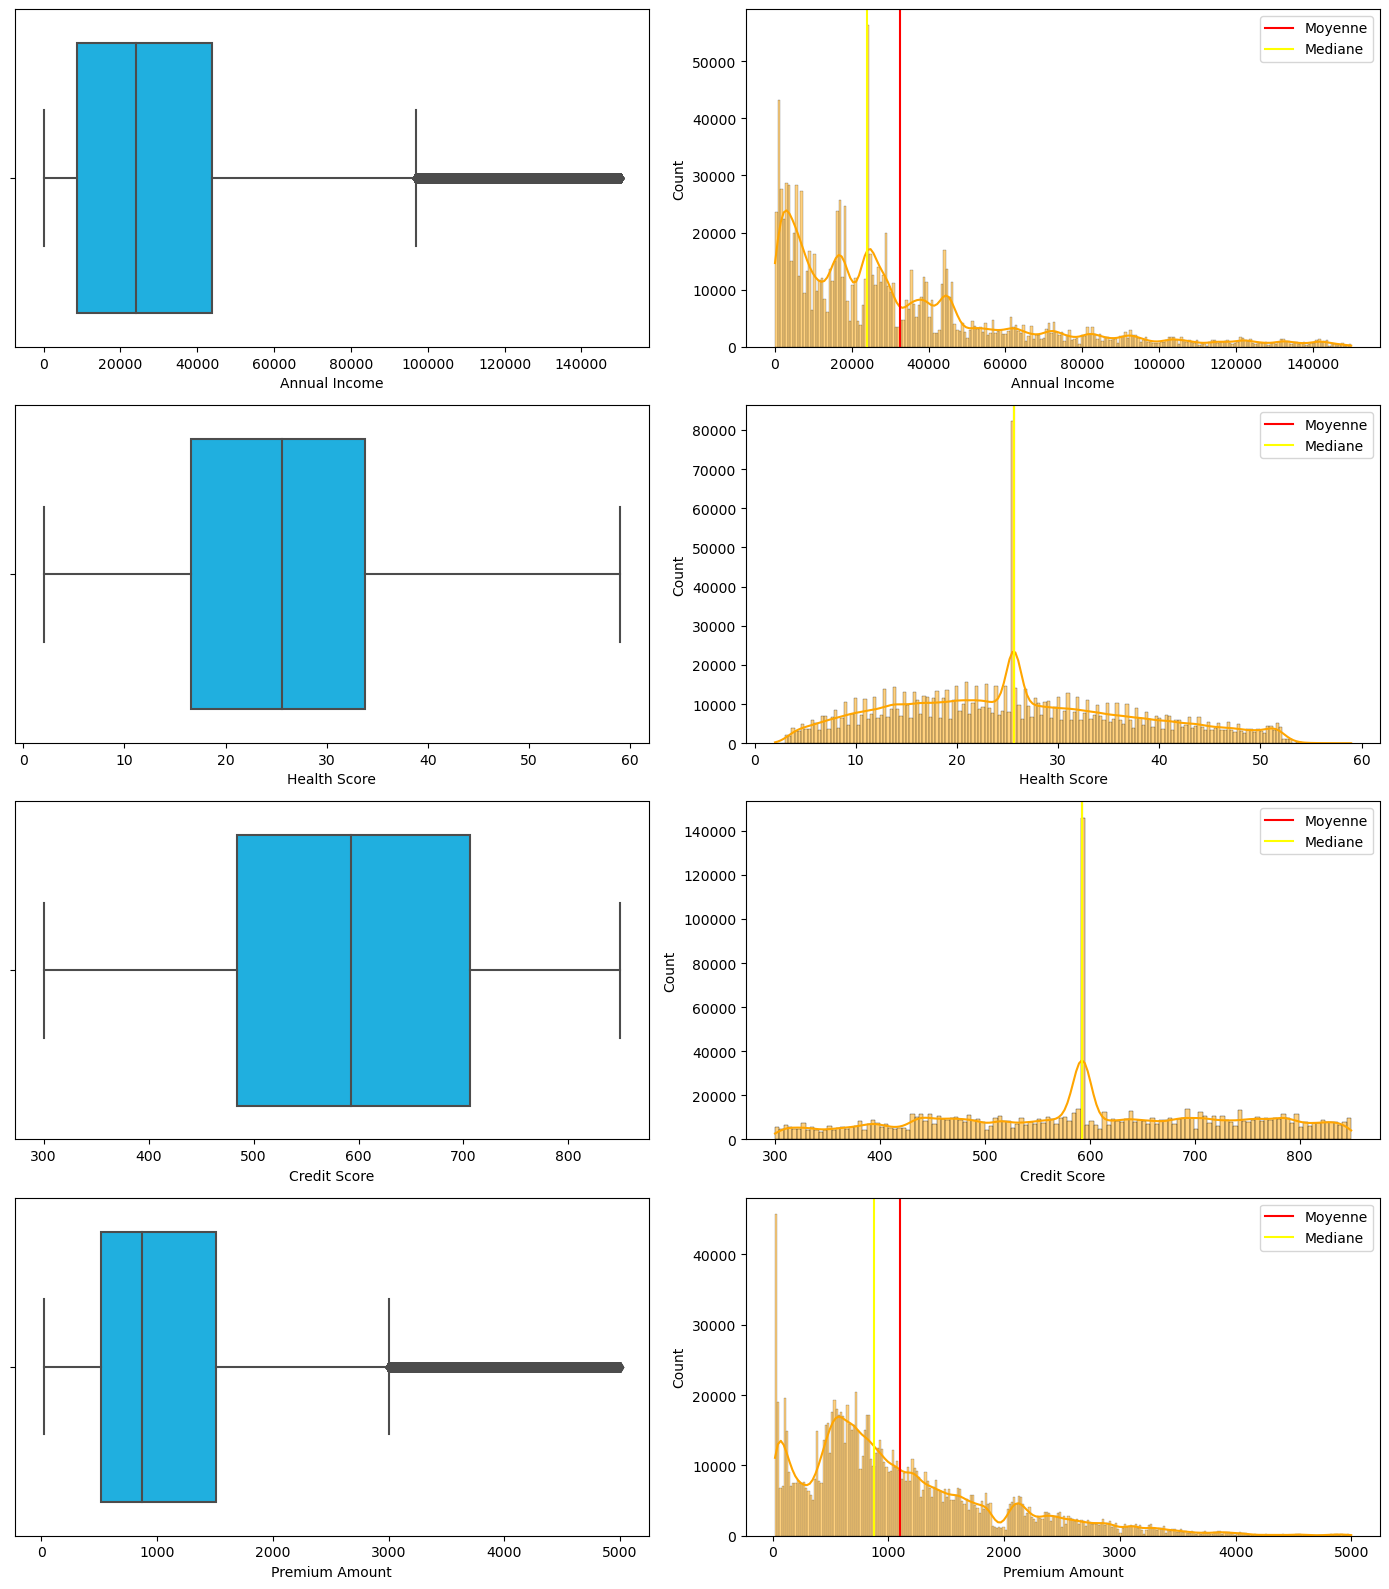

In [30]:
visualisation_var_cont(columns=var_cont,data=df, nrow=4,ncol=2,size=(14,16))

#### Observation : 
- Nous avons les 3 variables que nous avons déjà traité durant la partie imputation
- Regardons **Premium Amount** : c'est la **target**, elle contient des valeurs très éparses, allant de 0 à 5000. Elle représente **le montant de la prime d'assurance**. Avec une valeur moyenne & médiane autour de 1000

##### Shapiro test :
- Même si graphiquement c'est assez explicite, on peut quand même faire le test de normalité permettant d'adapter les tests statistiques ultérieurement : 

In [370]:
def shapiro_test(list_col):
    """
    Cette fonction teste si list_col est une liste, si ce n'est pas le cas,
    elle convertie le texte en une liste avant de faire un test shapiro pour vérifier
    si la feature suit une loi normale ou non
    """
    if type(list_col) != list:
        list_col = [list_col]

    accepted,rejected = [], []

    for col in df[list_col]:
        stat, p_value = shapiro(df[col])  
        alpha = 0.05
        if p_value > alpha: 
            result = colored('Accepter', 'green')  
            accepted.append(col)
        else:
            result = colored('Rejet','red')        
            rejected.append(col)

        print(f'{col:-<50}\t Hypothèse: {result}')
    return accepted,rejected

In [371]:
a,r = shapiro_test(var_cont)

Annual Income-------------------------------------	 Hypothèse: Rejet
Health Score--------------------------------------	 Hypothèse: Rejet
Credit Score--------------------------------------	 Hypothèse: Rejet
Premium Amount------------------------------------	 Hypothèse: Rejet


Aucune ne suit de loi normale, surtout pour **Premium Amount**

### variables discrètes :

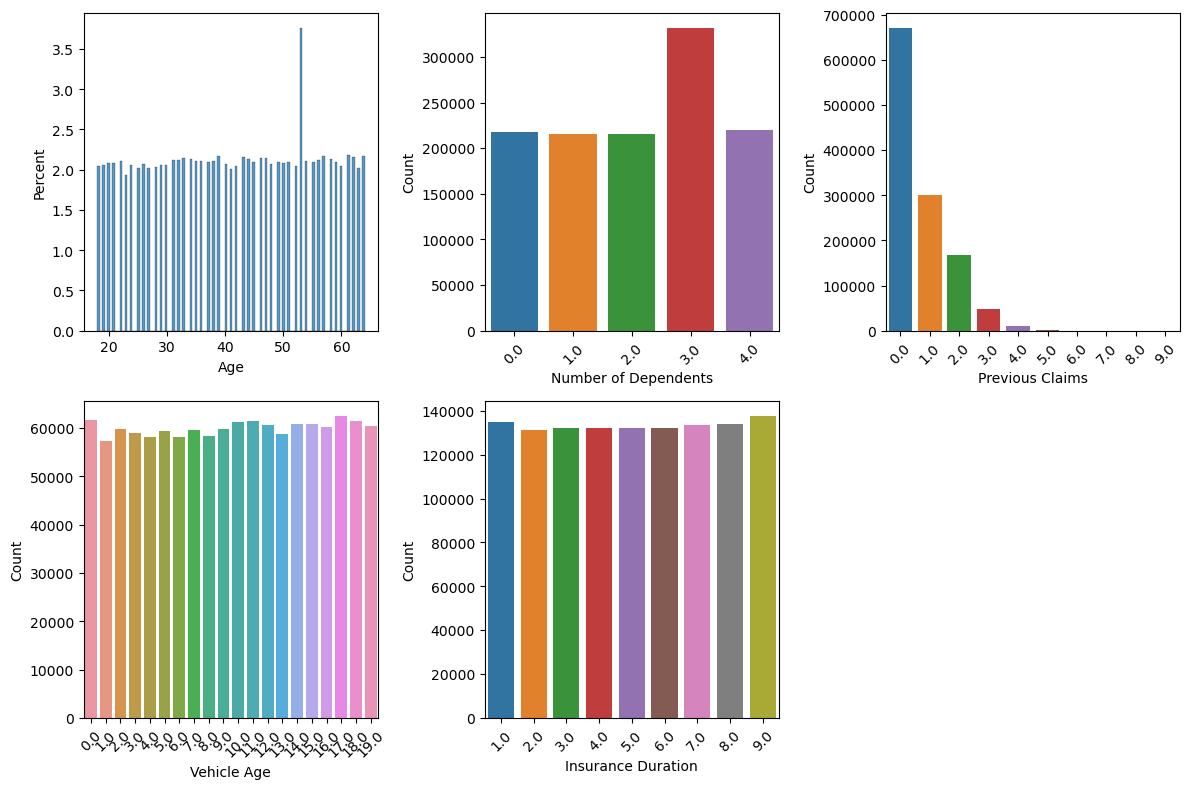

In [33]:
visualisation_var_dis(var_dis, df, 2,3,size=(12,8))

#### Observation : 
- On retrouve nos 5 variables discrètes que nous avons déjà traité dans la partie imputation

### Variables qualitatives : 

In [24]:
print(df.select_dtypes(include="object").nunique())
# Seule la variable temporelle contient un nombre de modalité très élevé 
#utilisons cette caractéristique pour séparer nos features :
var_qual = [i for i in df.select_dtypes(include="object") if df[i].nunique()<10]
var_tempo = [i for i in df.select_dtypes(include="object") if i not in var_qual]
print(colored(f"Variable qualitatives : ","red",attrs=["bold"]) , var_qual)
print(colored(f"Variable temporelles : ","green",attrs=["bold"]) , var_tempo)

Gender                     2
Marital Status             3
Education Level            4
Occupation                 3
Location                   3
Policy Type                3
Policy Start Date     167381
Customer Feedback          3
Smoking Status             2
Exercise Frequency         4
Property Type              3
dtype: int64
Variable qualitatives :  ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']
Variable temporelles :  ['Policy Start Date']


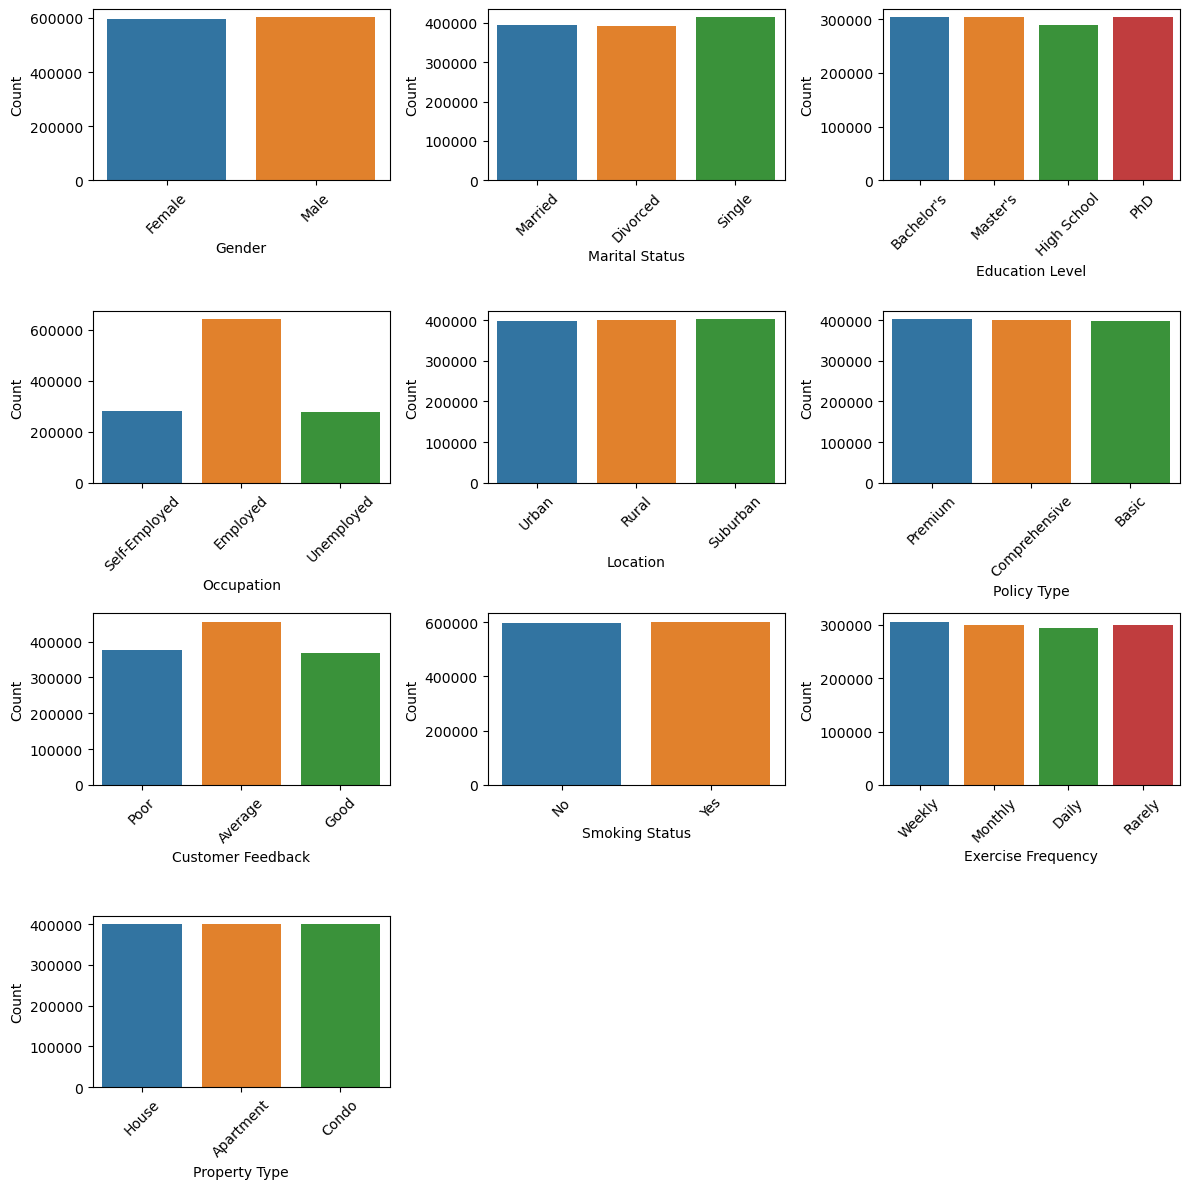

In [35]:
visualisation_var_dis(var_qual, df, 4,3,size=(12,12))

#### Observation : 
- A l'exception de **Occupation** qui présente une modalité majoritairement présente (**dû à notre imputation des données**) et **Customer Feedback** à moindre mesure pour les mêmes raisons, **toutes les features ont des modalités équilibrés**

### Variables temporelles : 
- Comme il n'y a qu'**une seule feature** on peut utiliser un **déballage** en extrayant de la liste la feature :

In [373]:
[var_tempo] = var_tempo
var_tempo

'Policy Start Date'

In [374]:
#Convertissons la feature dans au bon format (date) :
df[var_tempo] = pd.to_datetime(df[var_tempo])
df[[var_tempo]].head()

,Policy Start Date
0,2023-12-23 15:21:39.134960
1,2023-06-12 15:21:39.111551
2,2023-09-30 15:21:39.221386
3,2024-06-12 15:21:39.226954
4,2021-12-01 15:21:39.252145


In [375]:
#Formatons une nouvelle fois pour ne garder que la date : 
df[var_tempo] = pd.to_datetime(df[var_tempo].dt.date)
df[[var_tempo]].head()

,Policy Start Date
0,2023-12-23
1,2023-06-12
2,2023-09-30
3,2024-06-12
4,2021-12-01


Pour calculer certaines statistiques, nous aurons besoin d'extraire des éléments comme le mois, l'années etc.
- Nous allons extraire ces informations et les mettre dans un dataframe temporaire pour faciliter les analyses 

In [40]:
#Récupération du nom des mois de chaque date ainsi que le numéro associé :
monthname = df[var_tempo].dt.month_name()
month = df[var_tempo].dt.month

In [46]:
#Création d'un dictionnaire {numéro du mois - mois }
month_dict = dict(zip(month,monthname ))
month_dict = dict(sorted(month_dict.items()))
month_dict

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

In [44]:
#Création du dataframe temporaire :
df_tempo = pd.DataFrame()

In [45]:
#Ajout des infos extraite contenant le numéro du mois et son nom associé :
df_tempo["month"] = month
df_tempo["monthname"] = monthname
df_tempo[var_tempo] =df[var_tempo]
df_tempo.head(3)

,month,monthname,Policy Start Date
0,12,December,2023-12-23
1,6,June,2023-06-12
2,9,September,2023-09-30


In [47]:
#Maintenant nous pouvons transformer la colonne monthname en variable catégorique en indiquant le bon ordre : 
df_tempo['monthname'] = pd.Categorical(df_tempo['monthname'], categories=list(month_dict.values()), ordered=True)

In [48]:
count_month = df_tempo.value_counts("monthname").sort_index()
count_month

monthname
January       98535
February      95924
March        102909
April        100906
May          105176
June          98500
July         100772
August       101077
September     99377
October       99408
November      99894
December      97522
Name: count, dtype: int64

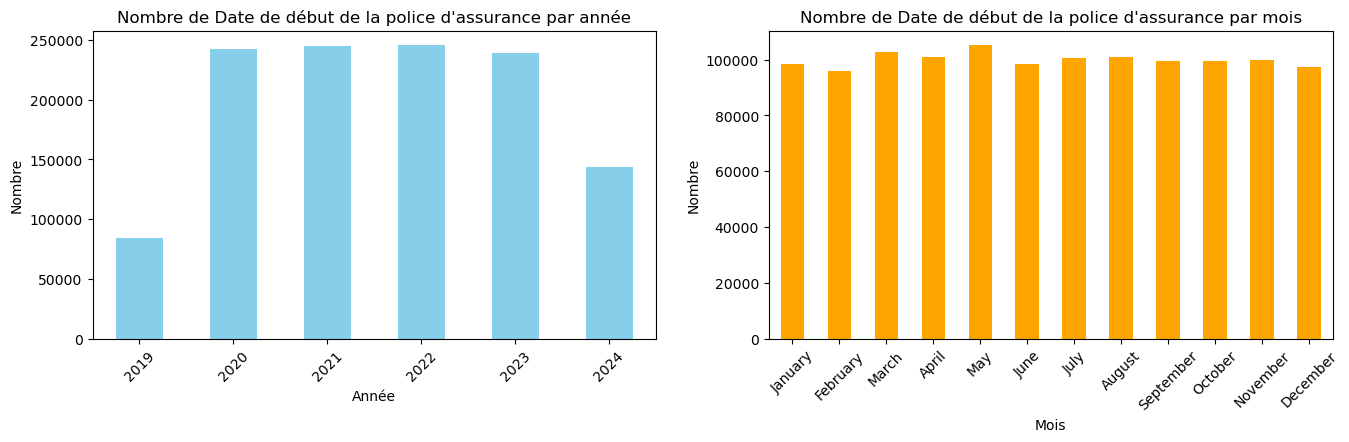

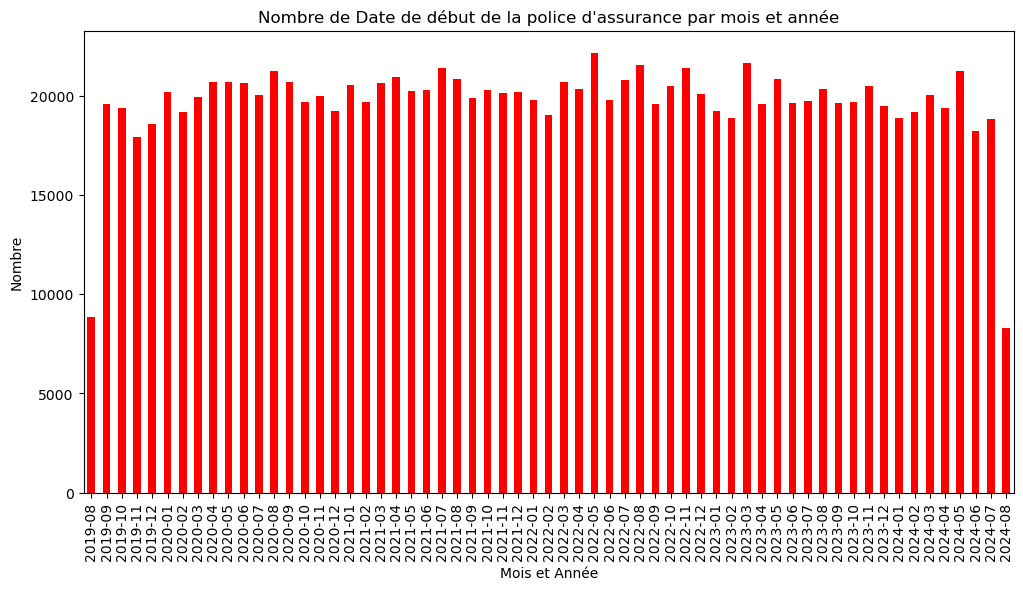

In [49]:
plt.figure(figsize=(16,4))

# Comptage par année
counts_by_year = df_tempo[var_tempo].dt.year.value_counts().sort_index()
# Visualisation
plt.subplot(1,2,1)
ax = counts_by_year.plot(kind='bar', color='skyblue')
lab = ax.get_xticklabels()
ax.set_xticklabels(lab, rotation=45)

plt.title("Nombre de Date de début de la police d'assurance par année")
plt.xlabel("Année")
plt.ylabel("Nombre")


# Comptage par mois
count_month = df_tempo.value_counts("monthname").sort_index()

# Visualisation
plt.subplot(1,2,2)
ax = count_month.plot(kind="bar" , color='orange')
plt.title("Nombre de Date de début de la police d'assurance par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre")
lab = ax.get_xticklabels()
ax.set_xticklabels(lab, rotation=45)
plt.show()


# Comptage par mois et année
counts_by_month_year = df_tempo[var_tempo].dt.to_period("M").value_counts().sort_index()
# Visualisation
ax = counts_by_month_year.plot(kind='bar', figsize=(12, 6), color='red')
plt.title("Nombre de Date de début de la police d'assurance par mois et année")
plt.xlabel("Mois et Année")
plt.ylabel("Nombre")
plt.show()

### Observation : 
- Nous avons des données de contrats d'assurance depuis aout 2018 jusqu'a aout 2024, soit 6 années 
- Là aussi nous avons un nombre pratiquement constant de contrat d'assurance : par années, par mois


##### Avant l'analyse bivariée nous pouvons vérifier si tous les types de données sont cohérents :

In [376]:
print(colored("VARIABLES CONTINUES", color="green", attrs=["bold"]))
print(df[var_cont].dtypes)
print(colored("VARIABLES DISCRETES", color="green", attrs=["bold"]))
print(df[var_dis].dtypes)
print(colored("VARIABLES QUALITATIVES", color="green", attrs=["bold"]))
print(df[var_qual].dtypes)
print(colored("VARIABLES TEMPORELLES", color="green", attrs=["bold"]))
print(df[[var_tempo]].dtypes)

VARIABLES CONTINUES
Annual Income     float64
Health Score      float64
Credit Score      float64
Premium Amount    float64
dtype: object
VARIABLES DISCRETES
Age                     int32
Number of Dependents    int32
Previous Claims         int32
Vehicle Age             int32
Insurance Duration      int32
dtype: object
VARIABLES QUALITATIVES
Gender                object
Marital Status        object
Education Level       object
Occupation            object
Location              object
Policy Type           object
Customer Feedback     object
Smoking Status        object
Exercise Frequency    object
Property Type         object
dtype: object
VARIABLES TEMPORELLES
Policy Start Date    datetime64[ns]
dtype: object


## 3.2 Analyse bivariée : Target Vs features
### Target vs variables continues


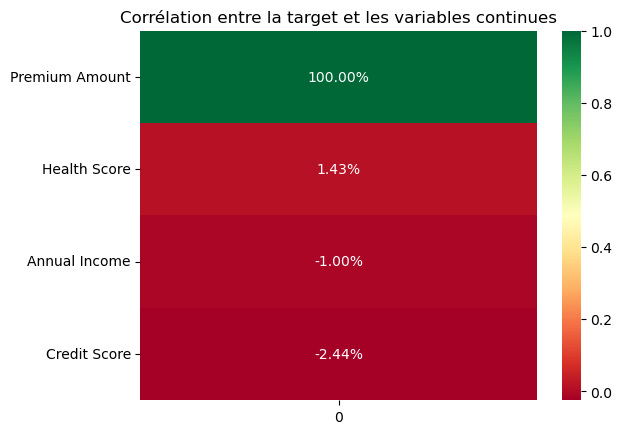

In [117]:
correlation = df[var_cont].corrwith(df['Premium Amount']) #corrwith() permet de calculer la corrélation entre
#la target et chaque variable continue

# Trier les valeurs de corrélation par ordre décroissant
sorted_correlation = correlation.sort_values(ascending=False)
# plt.figure(figsize=(10, 20))
heatmap = sns.heatmap(pd.DataFrame(sorted_correlation), annot=True, cmap='RdYlGn',fmt=".2%", cbar=True)
heatmap.set_title('Corrélation entre la target et les variables continues')
plt.show()

### Observation : 
- Très peu de corrélation target/features, on pourra noter une anticorrélation linéaire un peu plus marqué entre la target et **Credit Score** : plus le revenu annuel est élevé et plus le Credit score est faible


### Target vs variables qualitatives/discrètes
#### Vs Qualitatives : 

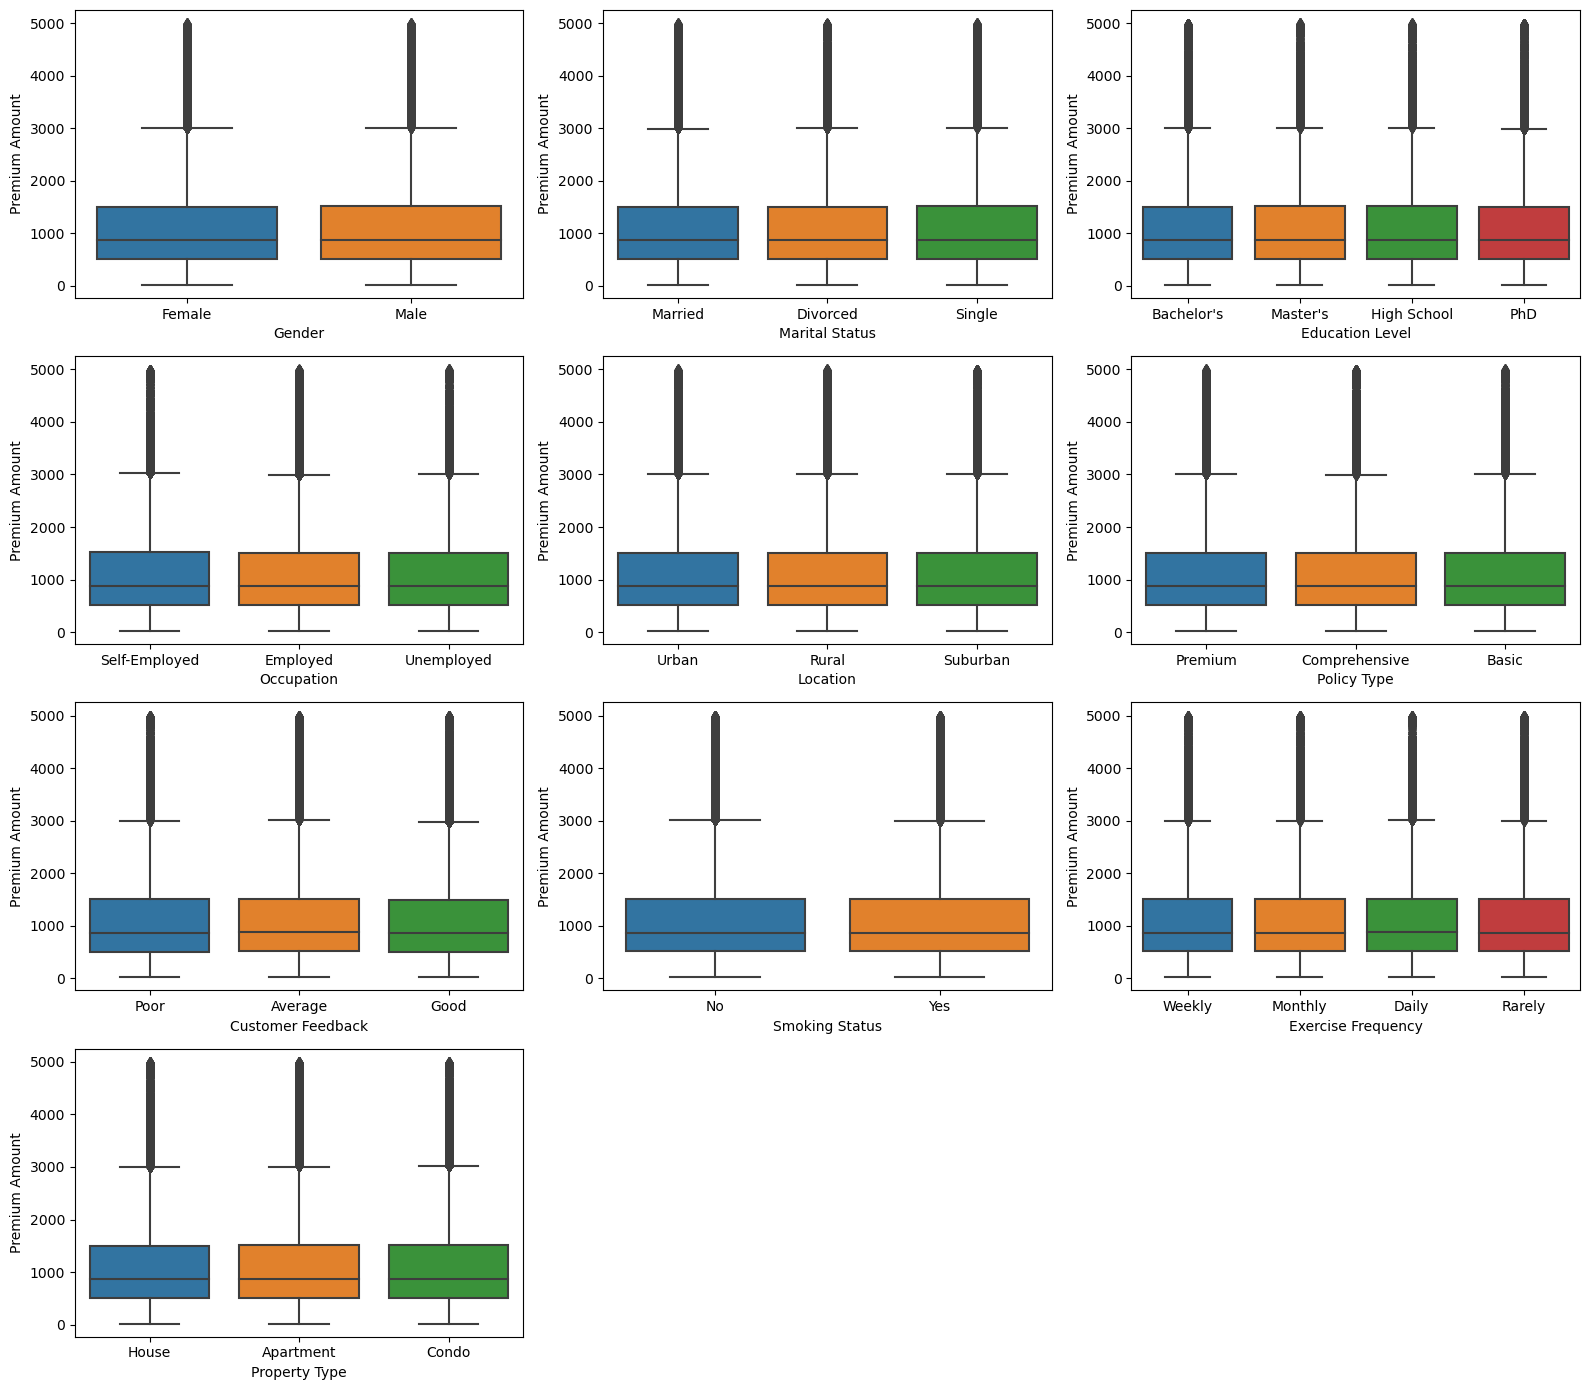

In [25]:
plt.figure(figsize=(16,14))
for i,col in enumerate(var_qual,1):
    plt.subplot(4,3,i)
    sns.boxplot(x=col, y = "Premium Amount", data = df)
plt.tight_layout()

### Observation : 
- les boxplots sont très similaires pour toutes les modalités de nos variables discrètes, cela indique probablement que ces variables n'expliquent pas une grande partie de la variabilité de notre variable cible

#### Vs  discrètes :

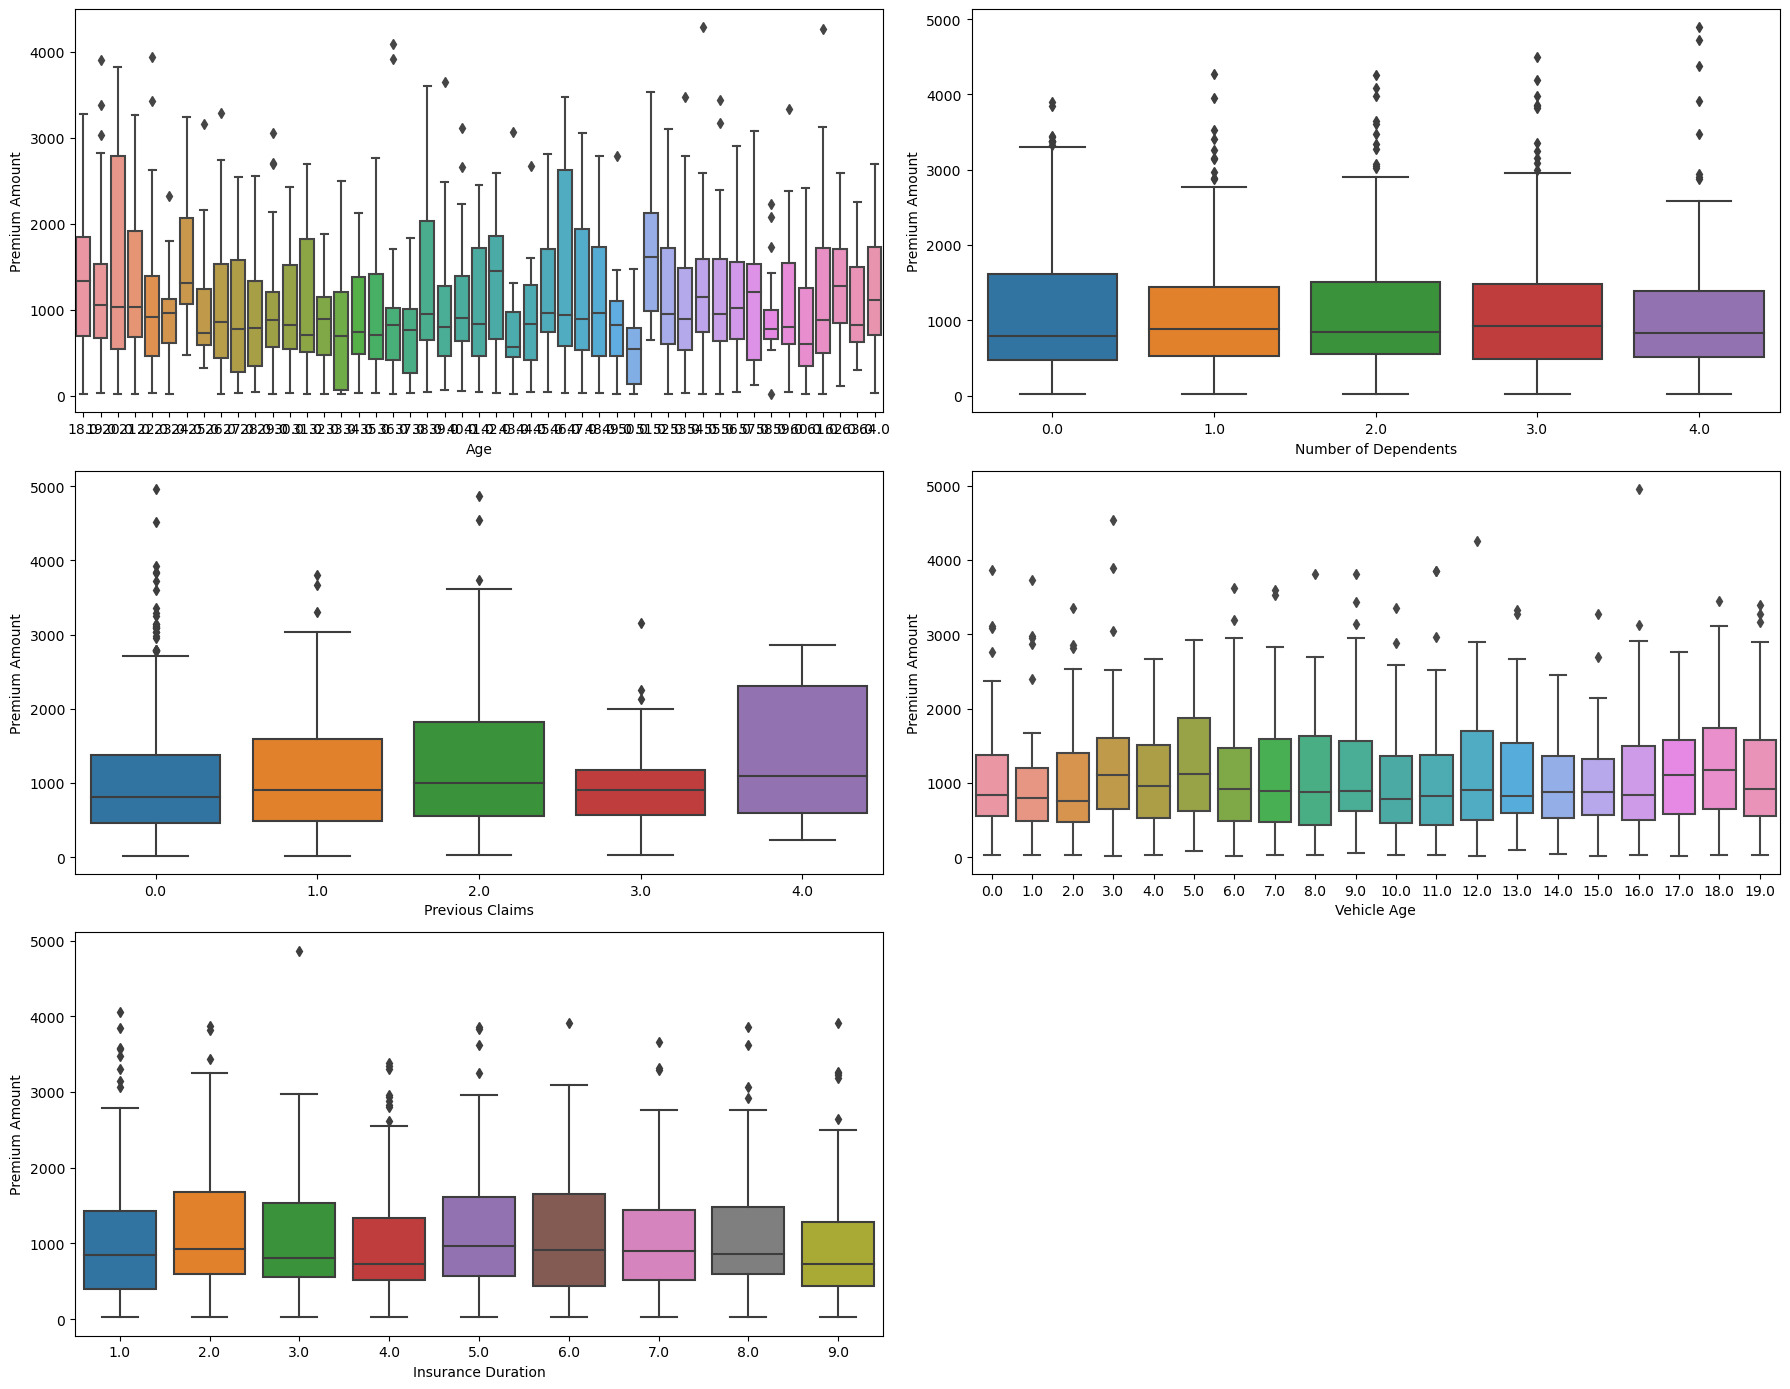

In [118]:
plt.figure(figsize=(18,14))
for i,col in enumerate(var_dis,1):
    plt.subplot(3,2,i)
    sns.boxplot(x=col, y = "Premium Amount", data = df.sample(10000))
        
plt.tight_layout()

#### Observation : 
- Ici c'est nettement plus interessant , on voit de la **variation entre les modalités de chaque features et la target**


### Target vs variable temporelle
- Nous allons créer une copie de notre dataframe est mettre la date en index afin de faciliter les manipulations pour la visualisation des données 

In [169]:
df_time = df.copy()
df_time = df_time.set_index('Policy Start Date')

Evolution de la prime d'assurance moyenne au fil des années


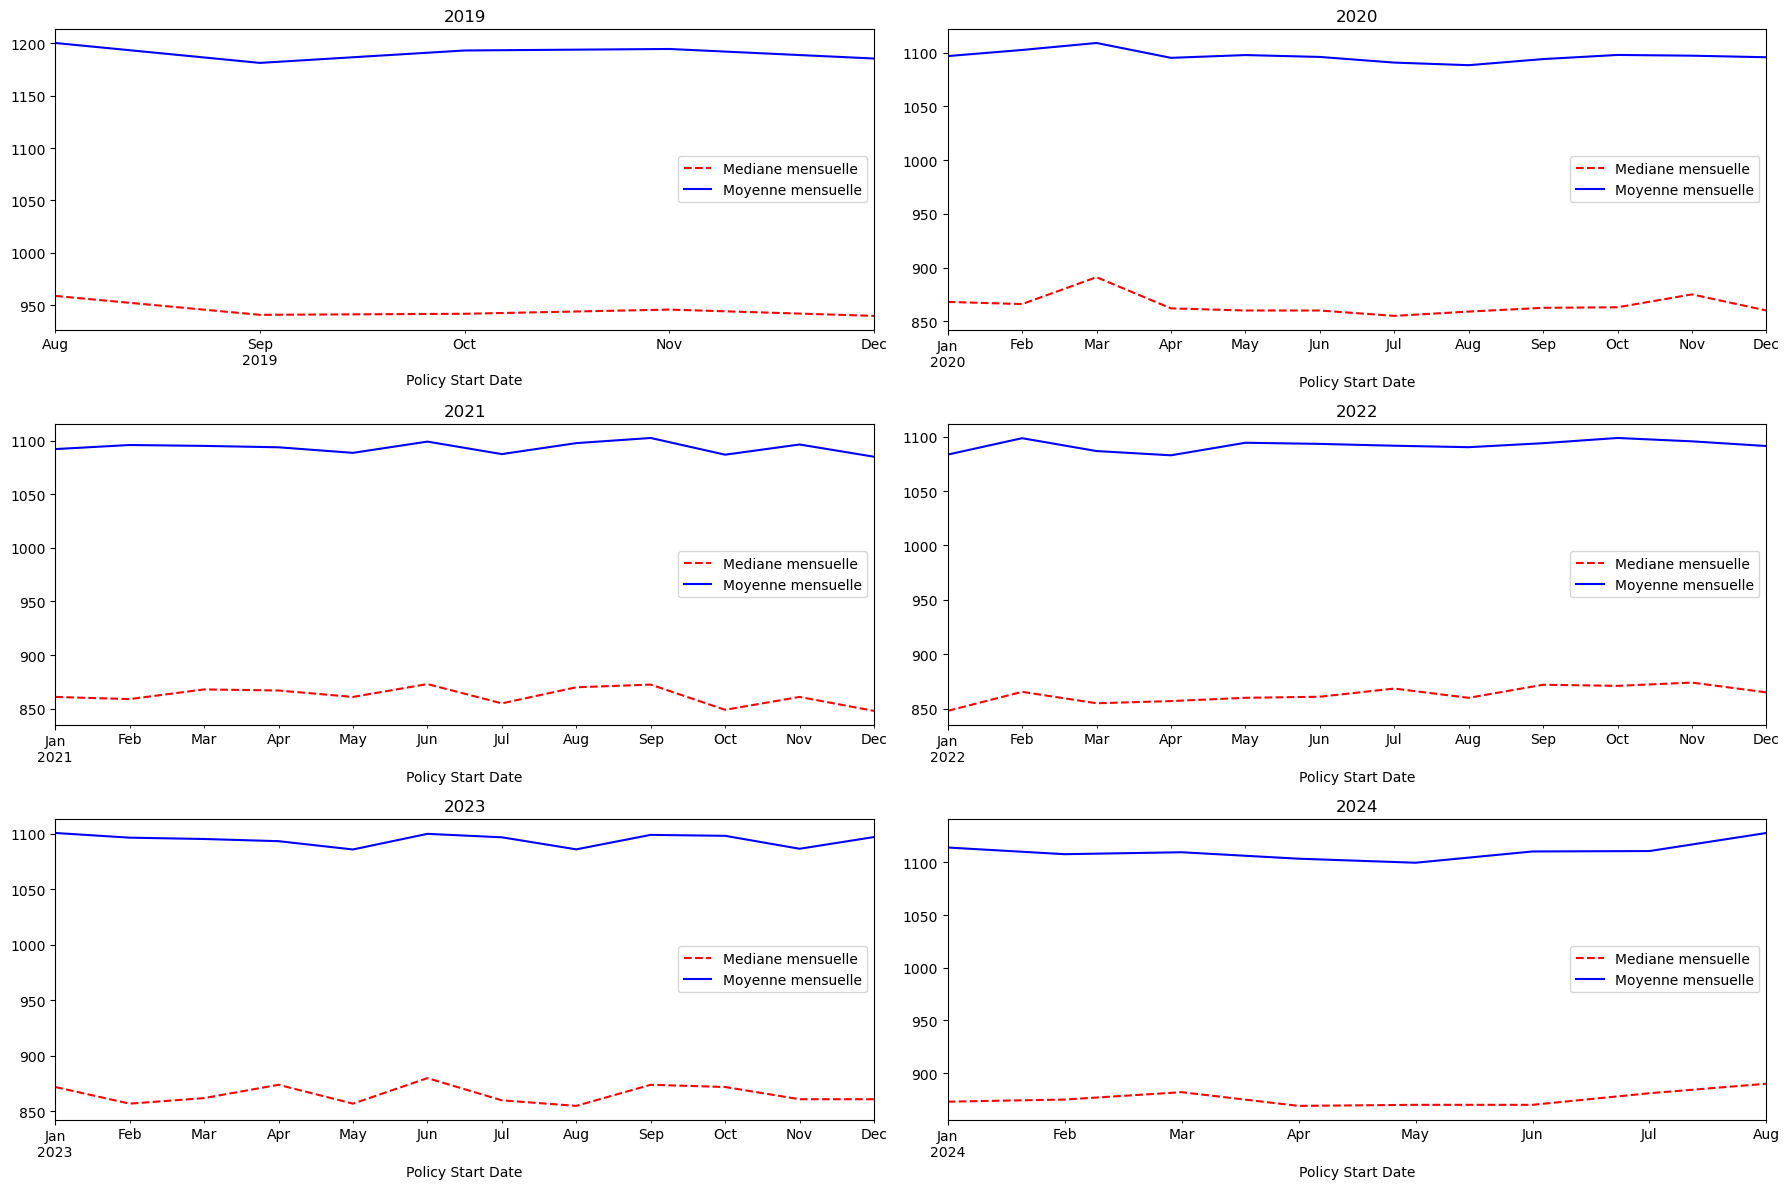

In [254]:
years =[ 2019,2020,2021,2022,2023,2024]
print(colored("Evolution de la prime d'assurance moyenne au fil des années","blue",attrs=["bold"]))
for i,k in enumerate(years,1):
    plt.subplot(3,2,i)
    df_time.loc[str(k),"Premium Amount"].resample("M").median().plot(figsize=(18,12), linestyle="--", c="red",
                                                                     label = "Mediane mensuelle" )
    df_time.loc[str(k),"Premium Amount"].resample("M").mean().plot(figsize=(18,12),
                                                                   label = "Moyenne mensuelle",c="blue" )
    plt.title(f"{k}")
    plt.legend()
    plt.tight_layout()
plt.show()

#### Observation : 
- Pas de grande différence entre le prix moyen/median de la prime d'assurance
- Peu de variation  de la prime selon l'années

## Conclusion de la visualisation  :
- Les données sont très **homogènes**, très peu de variabilité, les relations target-features (continues et qualitatives) sont  monotones.
- Pour ce qui est des variables discrètes le constat est différent : il y a de la **variabilité**, ce qui laisse à penser que ce sera certainement ces features là qui seront déterminante pour la prédiction de la target


- En d'autres terme ici nous comprenons que, le choix de la prédiction du montant de l'assurance (Premium Amount) est surtout influencé par des caractéristiques telles que : l'Age,  l'age du véhicule, la durée d'ancienneté de l'assuré (insurance duration) ou le nombre de sinistre antérieur.

- La prime d'assurance ne dépend pas du statut de la personne (emploi, niveau d'étude, adresse, condition de vie, etc) mais simplement de ce qui le lie directement au véhicule comme mentionné sur les points précédent

Afin de s'assurer de la dépendance ou non des features avec la target, nous allons effectuer différents tests statistiques 

## 4. Test statistique
### Target vs variable continues

Nous avions préalablement fait un test de normalité, aucune ne suivait une loi normale, donc nous allons faire un test de Kendall

In [266]:
def kendall(features, target,dataframe,retour=False):
    """
    Fonction qui effectue un test de Man Withney entre une variable qualitative et une variable continue
    features : liste de feature ou feature unique
    target : nom de la target
    dataframe : jeu de donnée contenant les features et la target
    renvoi un tuple de liste, le premier élément du tuple sont les variables à conserver, le second les variables à
    supprimer
    """
    var_a_conserver, var_a_supprimer = [],[]
    #si l'utilisateur n'entre qu'une seule feature, on la met en liste :
    if type(features) == str:
        features = [features]
    print(colored("P-values :","blue")) 
    print()

    
    #test correlation : 
    for feat in features:
        stat, pval = kendalltau(dataframe[feat],dataframe[target]) #test kendall
        alpha = 0.05
        if pval<alpha:
            print(f'{colored(feat,"green")} : {pval}')
            var_a_conserver.append(feat)
        else:
            print(f'{colored(feat,"red")} : {pval}')

            var_a_supprimer.append(feat)
    print()        
    print(colored("Variable a conserver ","green", attrs=["bold"]), var_a_conserver)
    print(colored("Variable a supprimer ","red", attrs=["bold"]), var_a_supprimer)
    if retour :
        return var_a_conserver, var_a_supprimer
        

In [261]:
kendall(var_cont, "Premium Amount",df)

P-values :

Annual Income : 0.0
Health Score : 2.717055535896684e-72
Credit Score : 0.0
Premium Amount : 0.0

Variable a conserver  ['Annual Income', 'Health Score', 'Credit Score', 'Premium Amount']
Variable a supprimer  []


### Target vs variables  qualitatives :
- Si la feature possède 2 modalité, un test de man whitney sera effectué, sinon dans le cas contraire (>2) un test de kruskal wallis 

In [278]:
col_manwhitney, col_kruskal =  [], []

for i in var_qual+var_dis:
    if df[i].nunique() == 2:
        col_manwhitney.append(i)
    else:
        col_kruskal.append(i)

In [305]:
def manwithney(features, target,dataframe,retour=False):
    """
    Fonction qui effectue un test de Man Withney entre une variable qualitative et une variable continue
    features : liste de feature ou feature unique
    target : nom de la target
    dataframe : jeu de donnée contenant les features et la target
    renvoi un tuple de liste, le premier élément du tuple sont les variables à conserver, le second les variables à
    supprimer
    """
    var_a_conserver, var_a_supprimer = [],[]
    #si l'utilisateur n'entre qu'une seule feature, on la met en liste :
    if type(features) == str:
        features = [features]
    print(colored("P-values :","blue")) 
    print()

    #test correlation : 
    for feat in features:
            # Séparation en deux groupes basés sur la variable qualitative
        group1 = dataframe[dataframe[feat] == dataframe[feat].unique()[0]][target]
        group2 = dataframe[dataframe[feat] == dataframe[feat].unique()[1]][target]
            
        # test de Mann-Whitney
        stat, pval = mannwhitneyu(group1, group2)
        alpha = 0.05
        if pval<alpha:
            print(f'{colored(feat,"green")} : {pval}')
            var_a_conserver.append(feat)
        else:
            print(f'{colored(feat,"red")} : {pval}')

            var_a_supprimer.append(feat)
    print()        
    print(colored("Variable a conserver ","green", attrs=["bold"]), var_a_conserver)
    print(colored("Variable a supprimer ","red", attrs=["bold"]), var_a_supprimer)
    if retour:
        return var_a_conserver, var_a_supprimer

    
    
def kruskal_wallis(feature, target, dataframe,retour=False):
    var_a_conserver = []
    var_a_supprimer = []

    # Test si la feature est une liste ou simplement une feature
    if type(feature) == str:
        feature = [feature]
    print(colored("P-values :","blue")) 

    for feat in feature:
        # Séparer les données en fonction des différentes valeurs prises par la variable qualitatives
        grouped_data = [dataframe.loc[dataframe[target] == category, feat] for category in dataframe[target].unique()]

        # Effectuer le test de Kruskal-Wallis
        statistic, pval = kruskal(*grouped_data)

        # Interpréter les résultats
        alpha = 0.05  # Niveau de signification
        if pval<alpha:
            print(f'{colored(feat,"green")} : {pval}')
            var_a_conserver.append(feat)
        else:
            print(f'{colored(feat,"red")} : {pval}')

            var_a_supprimer.append(feat)
    print()        
    print(colored("Variable a conserver ","green", attrs=["bold"]), var_a_conserver)
    print(colored("Variable a supprimer ","red", attrs=["bold"]), var_a_supprimer)
    if retour :
        return var_a_conserver, var_a_supprimer

In [306]:
manwithney(col_manwhitney, "Premium Amount",df)

P-values :

Gender : 0.8934858512249965
Smoking Status : 0.6803462465593562

Variable a conserver  []
Variable a supprimer  ['Gender', 'Smoking Status']


In [304]:
kruskal_wallis(col_kruskal,  "Premium Amount",df)

P-values :
Marital Status : 2.0135753589869403e-18
Education Level : 1.4534684550108995e-07
Occupation : 3.7677896077121576e-14
Location : 1.641405028485279e-08
Policy Type : 1.3352601328179044e-07
Customer Feedback : 1.1192922863191861e-21
Exercise Frequency : 1.6612627243806948e-11
Property Type : 1.5489053856361556e-17
Age : 2.2310317272473986e-13
Number of Dependents : 1.4024727071972464e-15
Previous Claims : 7.55534946380953e-305
Vehicle Age : 1.2005563716236542e-09
Insurance Duration : 1.3614746066233472e-13

Variable a conserver  ['Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Customer Feedback', 'Exercise Frequency', 'Property Type', 'Age', 'Number of Dependents', 'Previous Claims', 'Vehicle Age', 'Insurance Duration']
Variable a supprimer  []


#### Résultats qui peut paraitre étonnant pour le test de kruskal wallis, calculons les medianes pour voir s'il y a réellement une différence significative

In [355]:
for feat in var_qual:
    if df[feat].nunique()>2:
        uniq = df[feat].unique()
        for i in range(len(uniq)):
            print(feat, df.loc[df[feat] == uniq[i],"Premium Amount"].median())

Marital Status 870.0
Marital Status 870.0
Marital Status 877.0
Education Level 873.0
Education Level 871.0
Education Level 876.0
Education Level 869.0
Occupation 874.0
Occupation 871.0
Occupation 874.0
Location 874.0
Location 871.0
Location 871.0
Policy Type 870.0
Policy Type 873.0
Policy Type 874.0
Customer Feedback 868.0
Customer Feedback 882.0
Customer Feedback 861.0
Exercise Frequency 872.0
Exercise Frequency 871.0
Exercise Frequency 874.0
Exercise Frequency 871.0
Property Type 873.0
Property Type 872.0
Property Type 871.0


#### Observation : 
- Très faible variation de la médiane

## Bilan des tests statistiques :
- Sans surprise, les features comme **Gender ou Smoking Status** ne sont pas pertinente pour le modèle, la partie data visualisation nous montrer quasi aucune différence
- A l'inverse, le test de kruskal wallis indique une **différence significative** entre les features et la target. Ceci peut s'expliquer par **la taille de l'échantillon**. En effet, nous avons ici un jeu de de données contenant **1.200.000** observations

**Avec un échantillon de cette taille, les p-values obtenues sont presque garanties d'être significatives, même pour des différences minimes**

# Conclusion de l'EDA :

- On a vu que la relation feature - target n'était pas **linéaire**
- qu'il y a très peu de corrélation entre certaines features et la target
- que la target avait des **outliers** (moyenne autour de 1000 mais présence de quelques valeurs allant jusqu'à **5000**
- Les résultats obtenus nous conduisent à adopter la stratégie suivante :
    1. Modéliser en **conservant les features** jugées significative par le test de kruskal wallis
    2. Modéliser en **supprimant les features** jugées significative par le test de kruskal wallis

Autrement dit, une **modélisation** **avec** et une **sans** les **variables qualitatives**

***Remarque** : Dans les deux cas, nous ne conserverons pas la variable temporelle pour la modélisation*


## 5. Preprocessing :
- Nous allons procéder au prétraitement des données pour le train et le test set
- Puis nous allons séparer en 2 jeux de données : un avec les variables discrètes et l'autre sans

#### Imputation du test set 

In [377]:
test.isnull().sum()[test.isnull().sum()>0] #données manquantes pour les memes colonnes que le train

Age                      12489
Annual Income            29860
Marital Status           12336
Number of Dependents     73130
Occupation              239125
Health Score             49449
Previous Claims         242802
Vehicle Age                  3
Credit Score             91451
Insurance Duration           2
Customer Feedback        52276
dtype: int64

In [378]:
#  Utilisation des imputers qui ont été entrainés 
test[col_mean] = imputer_mean.transform(test[col_mean])
test[col_med] = imputer_med.transform(test[col_med])
test[col_most_freq] = imputer_most_freq.transform(test[col_most_freq])

In [380]:
test.isnull().sum()[test.isnull().sum()>0] #pu de données manquantes

Series([], dtype: int64)

#### Standardisation


In [381]:
# il faut retirer la target de la standardisation :
target = df["Premium Amount"]
var_cont.remove(target.name)

In [382]:
scaler = StandardScaler()
scaler.fit(df[var_cont]) #entrainement
df[var_cont] = scaler.transform(df[var_cont]) #transformation
test[var_cont] = scaler.transform(test[var_cont]) #transformation

#### Encodage
Ayant des colonnes avec plus de 2 catégories, on va utiliser un encodage OneHot plutôt qu'un OrdinalEncoder

In [383]:
df[var_qual].head()

,Gender,Marital Status,Education Level,Occupation,Location,Policy Type,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,Female,Married,Bachelor's,Self-Employed,Urban,Premium,Poor,No,Weekly,House
1,Female,Divorced,Master's,Employed,Rural,Comprehensive,Average,Yes,Monthly,House
2,Male,Divorced,High School,Self-Employed,Suburban,Premium,Good,Yes,Weekly,House
3,Male,Married,Bachelor's,Employed,Rural,Basic,Poor,Yes,Daily,Apartment
4,Male,Single,Bachelor's,Self-Employed,Rural,Premium,Poor,Yes,Weekly,House


In [384]:
# Initialisation de l'encodeur OneHotEncoder
# - sparse=False : Retourne une matrice dense, pratique pour la manipulation directe.
# - drop='first' : Supprime la première catégorie pour chaque variable afin d'éviter la colinéarité.
#    Exemple : Pour la variable 'Gender' avec ['Female', 'Male'] :
#      -> Une seule colonne 'Gender_Male' est créée.
#      -> Si 'Gender_Male = 0', cela correspond implicitement à 'Female'.
encoder = OneHotEncoder(sparse=False, drop='first',handle_unknown='ignore')
# handle_unknown='ignore' permet de gérer les catégories inconnues dans les données de test


# Entraînement et transformation des variables qualitatives
encoded_columns = encoder.fit_transform(df[var_qual])

# Conversion des données encodées en DataFrame avec des noms explicites pour les colonnes
# - get_feature_names_out() : Génère des noms clairs comme 'Gender_Male' ou 'Color_Blue'.

var_qual_encoded = encoder.get_feature_names_out()

encoded_df = pd.DataFrame(encoded_columns,
                          columns=var_qual_encoded
                          )
encoded_df.head()

,Gender_Male,Marital Status_Married,Marital Status_Single,Education Level_High School,Education Level_Master's,Education Level_PhD,Occupation_Self-Employed,Occupation_Unemployed,Location_Suburban,Location_Urban,Policy Type_Comprehensive,Policy Type_Premium,Customer Feedback_Good,Customer Feedback_Poor,Smoking Status_Yes,Exercise Frequency_Monthly,Exercise Frequency_Rarely,Exercise Frequency_Weekly,Property Type_Condo,Property Type_House
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


In [385]:
#Remplacement des anciennes variables qualitatives par celles encodées :
df = df.drop(var_qual, axis=1) #suppression des anciennes variables 

In [386]:
#Fusion des deux dataframes :
df = pd.concat([df, encoded_df], axis=1)

##### pour le test set :

In [388]:
test_encoded = encoder.transform(test[var_qual])
df_test_encoded = pd.DataFrame(test_encoded,
                          columns=var_qual_encoded
                          )
df_test_encoded.head()

,Gender_Male,Marital Status_Married,Marital Status_Single,Education Level_High School,Education Level_Master's,Education Level_PhD,Occupation_Self-Employed,Occupation_Unemployed,Location_Suburban,Location_Urban,Policy Type_Comprehensive,Policy Type_Premium,Customer Feedback_Good,Customer Feedback_Poor,Smoking Status_Yes,Exercise Frequency_Monthly,Exercise Frequency_Rarely,Exercise Frequency_Weekly,Property Type_Condo,Property Type_House
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [390]:
#Suppression variable qualitatives et remplacement par le variables encodées :
test = test.drop(var_qual, axis = 1) 
test = pd.concat([test, df_test_encoded], axis = 1)
test.head()

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Gender_Male,Marital Status_Married,Marital Status_Single,Education Level_High School,Education Level_Master's,Education Level_PhD,Occupation_Self-Employed,Occupation_Unemployed,Location_Suburban,Location_Urban,Policy Type_Comprehensive,Policy Type_Premium,Customer Feedback_Good,Customer Feedback_Poor,Smoking Status_Yes,Exercise Frequency_Monthly,Exercise Frequency_Rarely,Exercise Frequency_Weekly,Property Type_Condo,Property Type_House
0,1200000,28.0,-0.952198,4.0,-1.519011,0.0,19.0,-1.611408e-15,1.0,2023-06-04 15:21:39.245086,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1,1200001,31.0,2.961093,2.0,-1.034831,0.0,14.0,-1.565702e+00,8.0,2024-04-22 15:21:39.224915,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1200002,47.0,-0.484644,0.0,-0.106539,0.0,16.0,1.602209e+00,9.0,2023-04-05 15:21:39.134960,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,1200003,28.0,-0.062953,3.0,-1.732344,1.0,3.0,1.254944e+00,5.0,2023-10-25 15:21:39.134960,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1200004,24.0,-0.681667,2.0,-1.164875,0.0,14.0,1.148638e+00,7.0,2021-11-26 15:21:39.259788,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


##### Suppression variable temporelle :

In [397]:
df = df.drop(var_tempo, axis = 1)
test = test.drop(var_tempo, axis = 1)

## 6. Enregistrement des dataframes 

#### Dataframe en conservant les variables qualitatives :

In [405]:
df.to_csv("train_preprocessed_With_AllFeat.csv")

In [406]:
test.to_csv("test_preprocessed_With_AllFeat.csv")

#### Dataframe sans les variables qualitatives :

In [407]:
df = df.drop(var_qual_encoded, axis = 1)

In [412]:
test = test.drop(var_qual_encoded, axis = 1)

In [413]:
df.to_csv("train_preprocessed_Without_AllFeat.csv")

In [414]:
test.to_csv("test_preprocessed_Without_AllFeat.csv")